In [2]:
!pip install yfinance statsmodels

In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import eda as eda
import warnings
warnings.filterwarnings('ignore','FutureWarning')

# **Data Retrieval and Exploratory Data Analysis (EDA)**

***Data Retrieval***

In [13]:
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2025-01-31'

data = eda.fetch_financial_data (tickers, start_date, end_date)

[*********************100%***********************]  3 of 3 completed


***Data Cleaning and Understanding***

In [14]:
data = eda.preprocess_data (data)

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-01-02 to 2025-01-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BND     2535 non-null   float64
 1   SPY     2535 non-null   float64
 2   TSLA    2535 non-null   float64
dtypes: float64(3)
memory usage: 79.2 KB
None

Initial Data Description:
Ticker          BND          SPY         TSLA
count   2535.000000  2535.000000  2535.000000
mean      69.083444   316.067402   117.848209
std        4.777898   117.926910   116.508288
min       61.676979   156.800842     9.578000
25%       65.370338   214.841972    17.228000
50%       68.125969   277.117920    30.298000
75%       72.663246   405.869202   221.525002
max       78.588905   609.750000   479.859985

Missing Values:
Ticker
BND     0
SPY     0
TSLA    0
dtype: int64


/content/eda.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


***Exploratory Data Analysis***

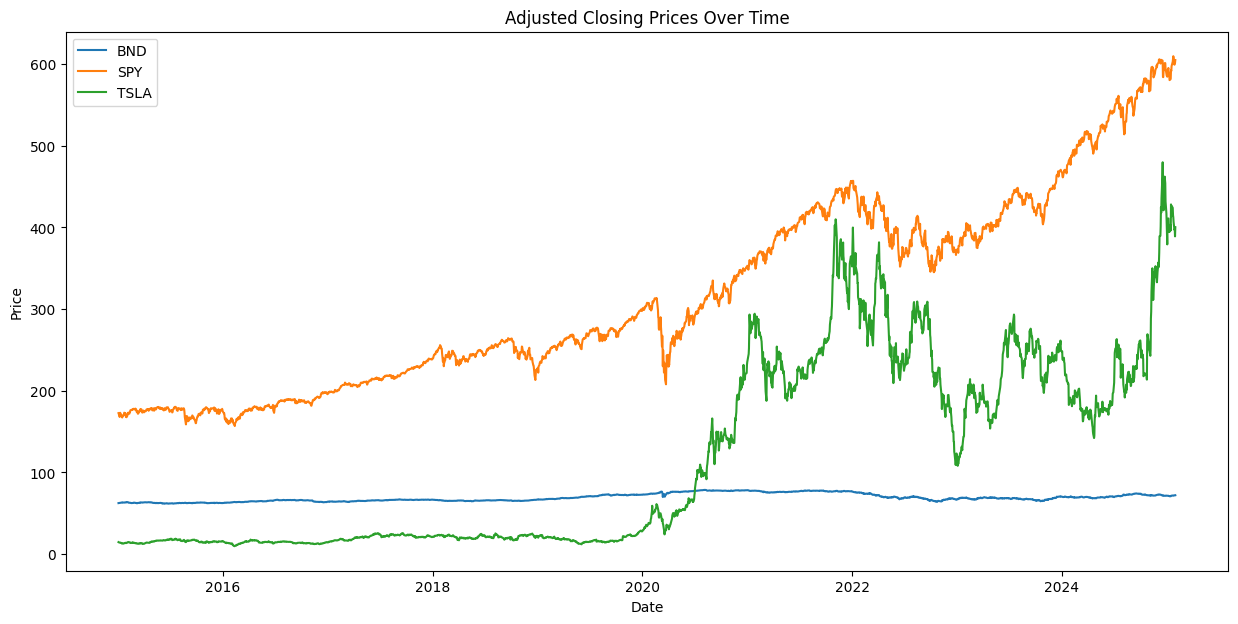

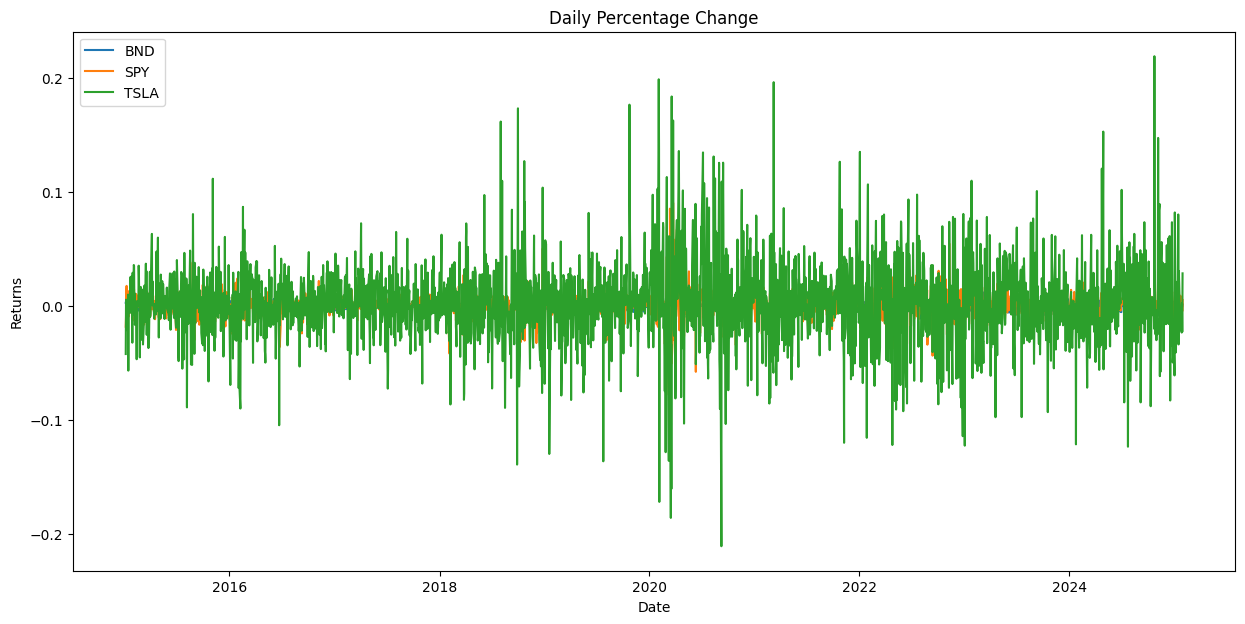

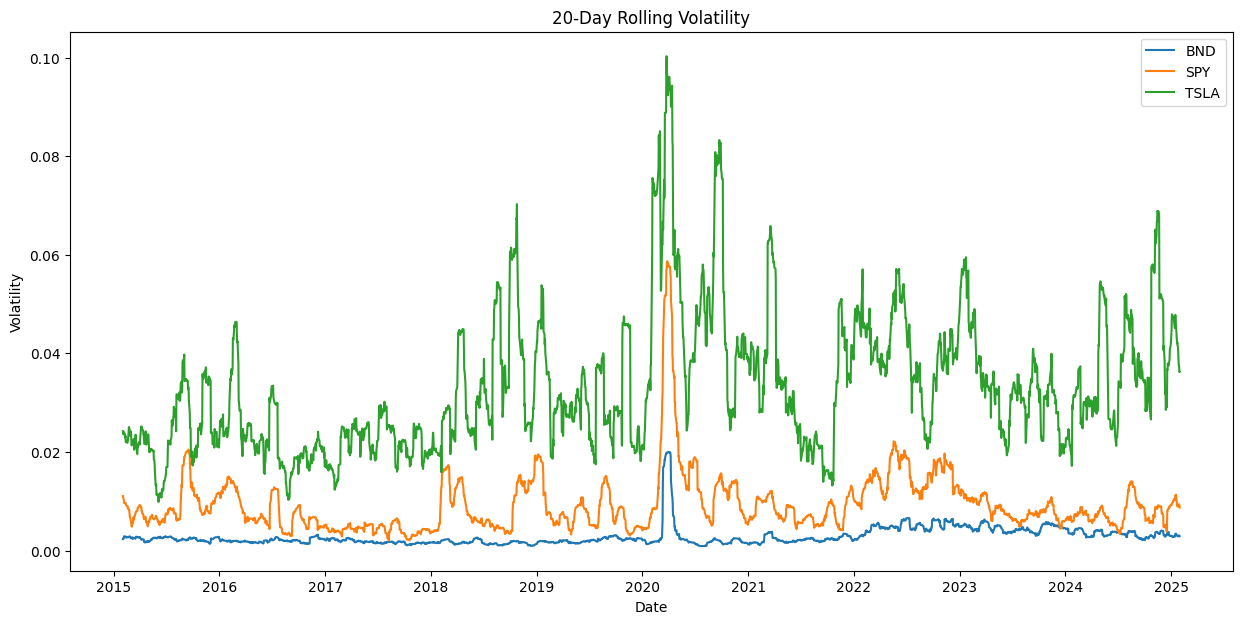

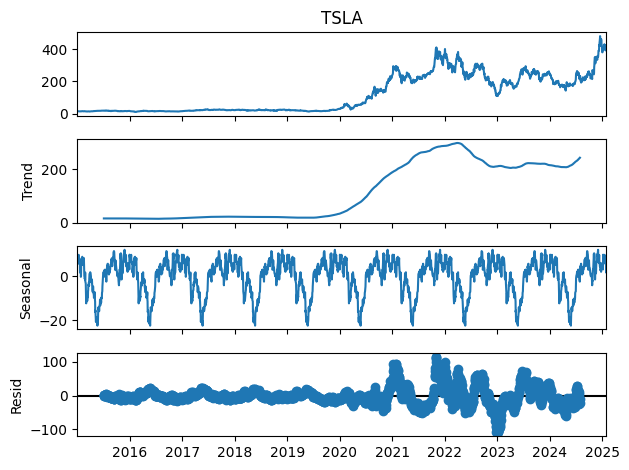

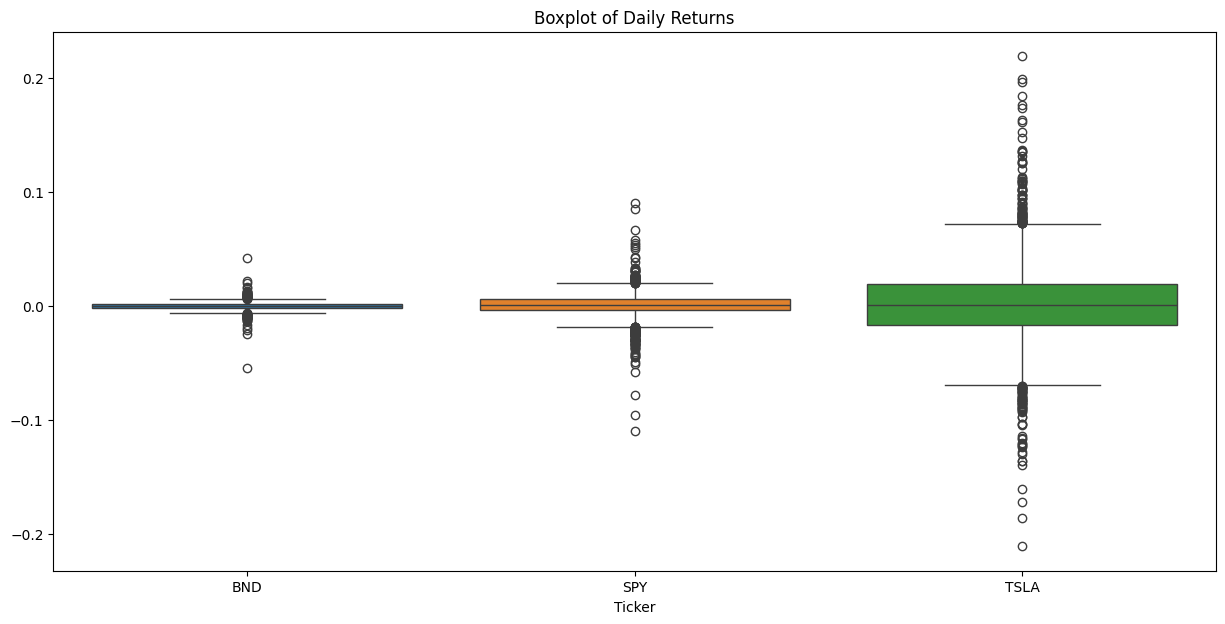

In [15]:
daily_returns = eda.perform_eda(data)

***VaR and Sharpe Ratio***


Risk Metrics:
Mean Returns:
 Ticker
BND     0.000062
SPY     0.000557
TSLA    0.001952
dtype: float64

Standard Deviations:
 Ticker
BND     0.003427
SPY     0.011083
TSLA    0.036005
dtype: float64

VaR (95%):
 Ticker
BND    -0.004802
SPY    -0.016719
TSLA   -0.051387
Name: 0.05, dtype: float64

Sharpe Ratio:
 Ticker
BND     0.018204
SPY     0.050239
TSLA    0.054218
dtype: float64

--- VaR and Sharpe Ratio Analysis ---

Value at Risk (VaR):
VaR at 95% confidence represents the maximum potential loss that an investment could experience with a 95% probability over a given period.
Lower (more negative) VaR values indicate lower risk. In our analysis:
- TSLA's VaR (95%): -0.0514
- SPY's VaR (95%): -0.0167
- BND's VaR (95%): -0.0048
TSLA has the highest potential for loss, followed by SPY, while BND shows the least potential for loss, consistent with our volatility analysis.

Sharpe Ratio:
The Sharpe Ratio measures risk-adjusted return. A higher Sharpe Ratio indicates better risk-adjusted

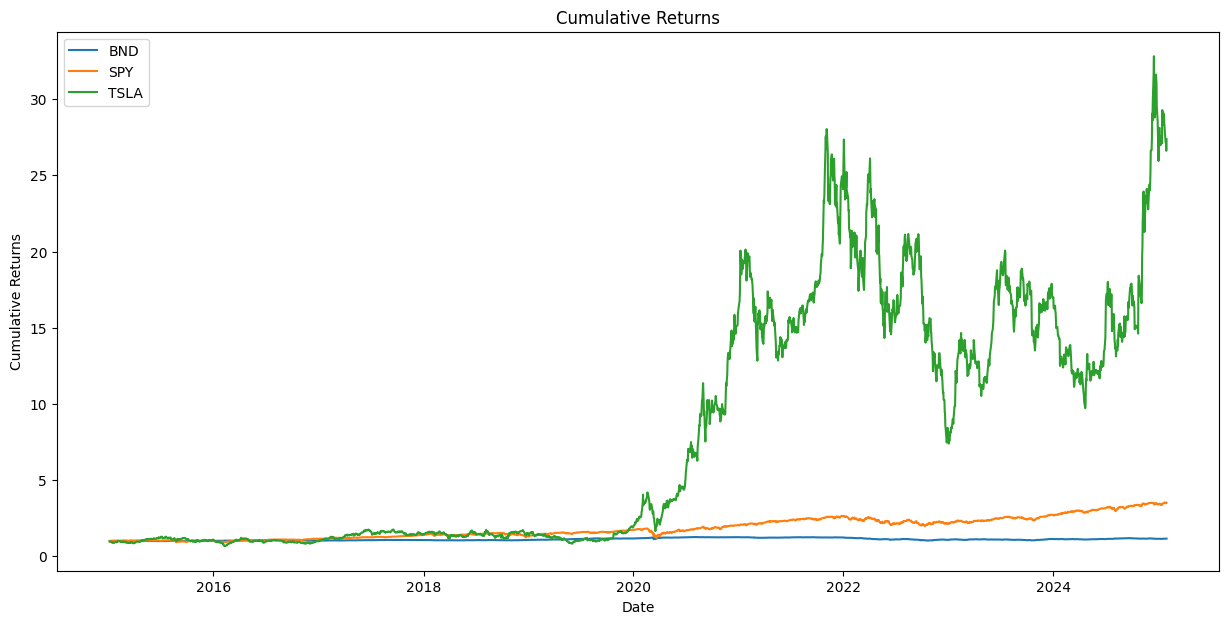

In [16]:
cumulative_returns = eda.calculate_risk_metrics(daily_returns, data)

In [17]:
data.to_csv('/content/financial_data.csv')  # Save combined data
daily_returns.to_csv('/content/daily_returns.csv')  # Save daily returns
cumulative_returns.to_csv('/content/cumulative_returns.csv') # Save cumulative returns